In [0]:
from google.colab import drive 
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
import os
import numpy as np
import pandas as pd
%cd "/content/gdrive/My Drive/thesis/Data"

#csv import labels

train_ACL_labels = np.array(pd.read_csv("train-acl.csv", header=None).iloc[:,1])
train_abnormal_labels = np.array(pd.read_csv("train-abnormal.csv", header=None).iloc[:,1])
train_meniscus_labels = np.array(pd.read_csv("train-meniscus.csv", header=None).iloc[:,1])

valid_ACL_labels = np.array(pd.read_csv("valid-acl.csv", header=None).iloc[:,1])
valid_abnormal_labels = np.array(pd.read_csv("valid-abnormal.csv", header=None).iloc[:,1])
valid_meniscus_labels = np.array(pd.read_csv("valid-meniscus.csv", header=None).iloc[:,1])

test_ACL_labels = np.array(pd.read_csv("test-acl.csv", header=None).iloc[:,1])
test_abnormal_labels = np.array(pd.read_csv("test-abnormal.csv", header=None).iloc[:,1])
test_meniscus_labels = np.array(pd.read_csv("test-meniscus.csv", header=None).iloc[:,1])

#data path
train_path = "/content/gdrive/My Drive/thesis/Data/train"
train_axial_path = "/content/gdrive/My Drive/thesis/Data/train/coronal"

counter = 5
for filename in os.listdir(train_axial_path):
  if counter > 0:
    file0 = np.load(train_axial_path + '/' + filename)
    variancelist = []
    for slice in range(file0.shape[0]):
      variancelist.append(np.var(file0[slice,:,:]))
    #print(file0)
    #print('max', np.amax(file0))
    #print('mean', np.mean(file0))
    #print(filename, 'file shape', file0.shape, 'max_var_index', variancelist.index(max(variancelist)), max(variancelist))
    counter = counter - 1

print(valid_ACL_labels)
print("done!")

/content/gdrive/My Drive/thesis/Data
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 1 1 0 1 0]
done!


In [0]:
from matplotlib import pyplot as plt

def barchart(x, y, title, xlabel, ylabel):
  plt.figure(0)
  plt.title(title)
  plt.bar(x, y)
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.show()
  return

In [0]:
path = "/content/gdrive/My Drive/thesis/Data/train/axial"

value_dict = dict()
mean_list = list()
std_list = list()

for filename in os.listdir(path):
    file0 = np.load(path + '/' + filename)
    stats0 = file0.flatten()
    mean_list.append(np.mean(stats0))
    std_list.append(np.std(stats0))
    file0 = (file0.flatten()).tolist()
    for value in file0:
      if value in value_dict.keys():
        value_dict[value] += 1
      else:
        value_dict[value] = 1

In [0]:
print(mean_list)
print(std_list)

print(' stats: \n')
print("mean and std of mean list", np.mean(mean_list), np.std(mean_list))
print("mean and std of std list", np.mean(std_list), np.std(std_list))

[63.24502667513761, 53.37339477539062, 53.104378951223275, 73.11680325594816, 64.90218315124511, 59.83934542027915, 55.44758395490975, 62.53127574920654, 68.98449666876542, 52.101463317871094, 73.74816934685958, 58.07023135098544, 55.25981106965438, 64.91785372220554, 55.11510467529297, 67.52352142333984, 75.4337781270345, 53.30364074707031, 61.13494669596354, 65.8330760755037, 59.22707663642036, 51.7453989982605, 62.3910764058431, 62.94316270616319, 65.5566695363898, 56.00462977091471, 58.45653749123598, 54.84954764626243, 69.6561954382694, 65.32119988335504, 74.19221382141113, 65.09798057406556, 65.77370720940667, 59.877376302083334, 71.30498563326321, 62.86517486572266, 52.86843578632061, 69.32682448167067, 64.21389529579564, 75.29146533542209, 51.404764635809535, 65.98475341796875, 66.84355043110095, 65.2356237931685, 54.27367273966471, 66.66869486933169, 58.51251554489136, 55.52388000488281, 65.80305032169117, 75.28624305725097, 61.314625666691704, 58.46388457542242, 69.5525168485

[93.685986  6.827448  9.066897 10.467267 11.679635 13.112094 15.492584
 19.793763 26.538247 35.429817 45.590096 55.39844  63.257587 67.99978
 68.933532 66.744726 61.700901 55.386524 48.578604 41.945278 36.128665
 30.966976 26.637942 23.093226 20.114099 17.679787 15.702623 14.120304
 12.828928 11.867618 11.060807 10.474752 10.023527  9.703304  9.485014
  9.346269  9.23859   9.191958  9.190123  9.182833  9.200045  9.237089
  9.260414  9.309996  9.35048   9.383772  9.426251  9.466575  9.497235
  9.547569  9.591684  9.611275  9.665314  9.689085  9.727041  9.772539
  9.807417  9.849706  9.897438  9.935168  9.985615 10.021351 10.067619
 10.124483 10.16769  10.19728  10.252358 10.286699 10.315152 10.358172
 10.376383 10.402247 10.199536  9.465333  9.421093  9.404119  9.375899
  9.348908  9.352191  9.327288  9.34651   9.352843  9.034129  8.756861
  8.710461  8.663749  8.623967  8.57652   8.562645  8.526188  8.499411
  8.486993  8.542035  7.95797   7.956052  7.908665  7.875762  7.824985
  7.799

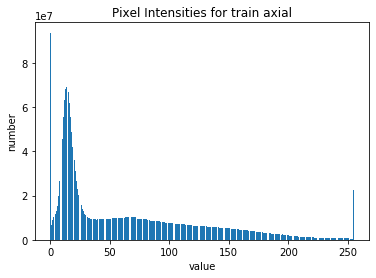

In [0]:
keylist = value_dict.keys()
keylist = list(keylist)
keylist.sort()

valuelist = [value_dict[key] for key in keylist]
valuelist = np.array(valuelist)

comp_value_list = np.divide(valuelist, 1000000)
print(comp_value_list)

barchart(keylist, valuelist, "Pixel Intensities for train axial" , 'value', 'number')

train axial stats: 
mean and std of mean list 63.15623203160096 6.243098755493374
mean and std of std list 60.46483274039529 2.423255865746446


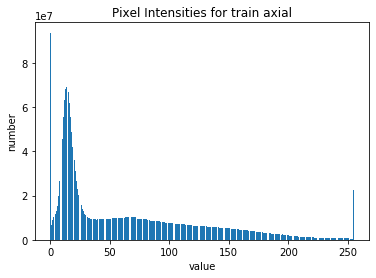

valid axial stats: 
mean and std of mean list 63.78701403818321 6.048546879771857
mean and std of std list 60.633883554311375 2.1470187290998335


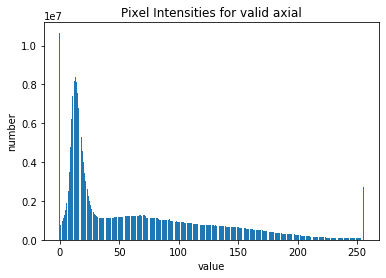

test axial stats: 
mean and std of mean list 63.62054192438069 5.82468040005745
mean and std of std list 60.58033419535018 2.3794872907528335


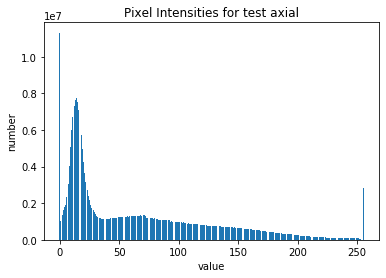

train sagittal stats: 
mean and std of mean list 58.24681201052347 4.80285935287548
mean and std of std list 48.15002141450444 2.4564034515441944


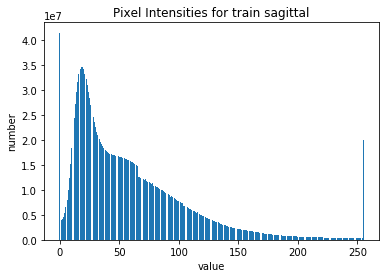

valid sagittal stats: 
mean and std of mean list 57.697031301495905 4.972325338781502
mean and std of std list 48.43310489802276 2.4255178409206413


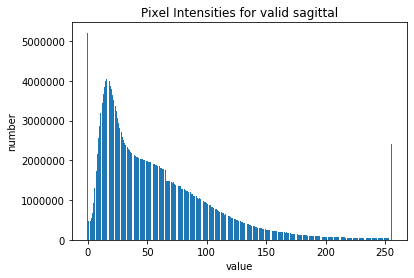

test sagittal stats: 
mean and std of mean list 58.078437704262164 5.043327050196679
mean and std of std list 48.16041545374768 2.4017461197650913


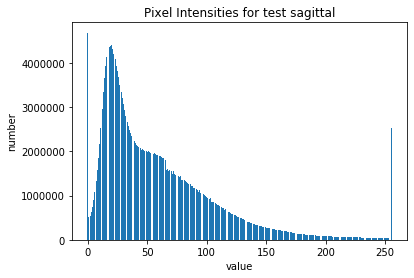

train coronal stats: 
mean and std of mean list 59.274452771370925 5.082412125474742
mean and std of std list 64.00930816470564 1.429674700086583


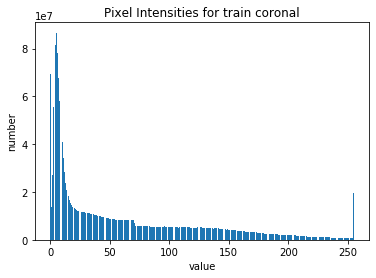

valid coronal stats: 
mean and std of mean list 59.27991431833099 4.804280884337564
mean and std of std list 63.87485960372401 1.4565844792931715


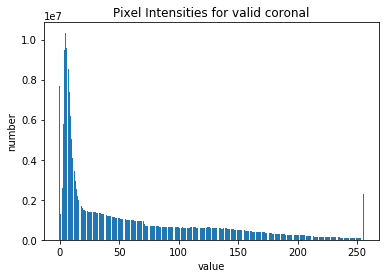

test coronal stats: 
mean and std of mean list 59.082364734491634 5.0083991088856425
mean and std of std list 64.05527921447272 1.4378362699164549


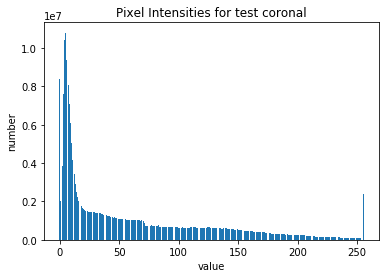

In [0]:
# visualize data 
root = "/content/gdrive/My Drive/thesis/Data/"
oris = ["axial", "sagittal", "coronal"]
sets = ["train", "valid", "test"]

for ori1 in oris:
  for set1 in sets:
    mean_list = list()
    std_list = list()
    value_dict = dict()
    path = root + '/' + set1 + '/' + ori1
    for filename in os.listdir(path):
      file0 = np.load(path + '/' + filename)
      stats0 = file0.flatten()
      mean_list.append(np.mean(stats0))
      std_list.append(np.std(stats0))
      file0 = (file0.flatten()).tolist()
      for value in file0:
        if value in value_dict.keys():
          value_dict[value] += 1
        else:
          value_dict[value] = 1
    keylist = value_dict.keys()
    keylist = list(keylist)
    keylist.sort()

    valuelist = [value_dict[key] for key in keylist]
    valuelist = np.array(valuelist)
    print(str(set1) + ' ' + str(ori1) + ' stats: ')
    print("mean and std of mean list", np.mean(mean_list), np.std(mean_list))
    print("mean and std of std list", np.mean(std_list), np.std(std_list))

    barchart(keylist, valuelist, "Pixel Intensities for " + str(set1) + ' ' + str(ori1) , 'value', 'number')



In [0]:
# model.py

import torch
import torch.nn as nn

from torchvision import models

class MRNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = models.alexnet(pretrained=True)
        self.gap = nn.AdaptiveAvgPool2d(1)
        self.classifier = nn.Linear(256, 1)

    # change this to adapt to different networks
    def forward(self, x):
        x = torch.squeeze(x, dim=0) # only batch size 1 supported
        x = self.model.features(x)
        # make sure that gap returns size 256
        x = self.gap(x).view(x.size(0), -1)
        x = torch.max(x, 0, keepdim=True)[0]
        x = self.classifier(x)
        return x

In [0]:
# Code taken from https://github.com/LiyuanLucasLiu/RAdam
# For the purposes of implementing RAdam

import math
import torch
from torch.optim.optimizer import Optimizer, required

class RAdam(Optimizer):

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8, weight_decay=0, degenerated_to_sgd=True):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
        
        self.degenerated_to_sgd = degenerated_to_sgd
        if isinstance(params, (list, tuple)) and len(params) > 0 and isinstance(params[0], dict):
            for param in params:
                if 'betas' in param and (param['betas'][0] != betas[0] or param['betas'][1] != betas[1]):
                    param['buffer'] = [[None, None, None] for _ in range(10)]
        defaults = dict(lr=lr, betas=betas, eps=eps, weight_decay=weight_decay, buffer=[[None, None, None] for _ in range(10)])
        super(RAdam, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(RAdam, self).__setstate__(state)

    def step(self, closure=None):

        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:

            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data.float()
                if grad.is_sparse:
                    raise RuntimeError('RAdam does not support sparse gradients')

                p_data_fp32 = p.data.float()

                state = self.state[p]

                if len(state) == 0:
                    state['step'] = 0
                    state['exp_avg'] = torch.zeros_like(p_data_fp32)
                    state['exp_avg_sq'] = torch.zeros_like(p_data_fp32)
                else:
                    state['exp_avg'] = state['exp_avg'].type_as(p_data_fp32)
                    state['exp_avg_sq'] = state['exp_avg_sq'].type_as(p_data_fp32)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']

                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                exp_avg.mul_(beta1).add_(1 - beta1, grad)

                state['step'] += 1
                buffered = group['buffer'][int(state['step'] % 10)]
                if state['step'] == buffered[0]:
                    N_sma, step_size = buffered[1], buffered[2]
                else:
                    buffered[0] = state['step']
                    beta2_t = beta2 ** state['step']
                    N_sma_max = 2 / (1 - beta2) - 1
                    N_sma = N_sma_max - 2 * state['step'] * beta2_t / (1 - beta2_t)
                    buffered[1] = N_sma

                    # more conservative since it's an approximated value
                    if N_sma >= 5:
                        step_size = math.sqrt((1 - beta2_t) * (N_sma - 4) / (N_sma_max - 4) * (N_sma - 2) / N_sma * N_sma_max / (N_sma_max - 2)) / (1 - beta1 ** state['step'])
                    elif self.degenerated_to_sgd:
                        step_size = 1.0 / (1 - beta1 ** state['step'])
                    else:
                        step_size = -1
                    buffered[2] = step_size

                # more conservative since it's an approximated value
                if N_sma >= 5:
                    if group['weight_decay'] != 0:
                        p_data_fp32.add_(-group['weight_decay'] * group['lr'], p_data_fp32)
                    denom = exp_avg_sq.sqrt().add_(group['eps'])
                    p_data_fp32.addcdiv_(-step_size * group['lr'], exp_avg, denom)
                    p.data.copy_(p_data_fp32)
                elif step_size > 0:
                    if group['weight_decay'] != 0:
                        p_data_fp32.add_(-group['weight_decay'] * group['lr'], p_data_fp32)
                    p_data_fp32.add_(-step_size * group['lr'], exp_avg)
                    p.data.copy_(p_data_fp32)

        return loss

class PlainRAdam(Optimizer):

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8, weight_decay=0, degenerated_to_sgd=True):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
                    
        self.degenerated_to_sgd = degenerated_to_sgd
        defaults = dict(lr=lr, betas=betas, eps=eps, weight_decay=weight_decay)

        super(PlainRAdam, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(PlainRAdam, self).__setstate__(state)

    def step(self, closure=None):

        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:

            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data.float()
                if grad.is_sparse:
                    raise RuntimeError('RAdam does not support sparse gradients')

                p_data_fp32 = p.data.float()

                state = self.state[p]

                if len(state) == 0:
                    state['step'] = 0
                    state['exp_avg'] = torch.zeros_like(p_data_fp32)
                    state['exp_avg_sq'] = torch.zeros_like(p_data_fp32)
                else:
                    state['exp_avg'] = state['exp_avg'].type_as(p_data_fp32)
                    state['exp_avg_sq'] = state['exp_avg_sq'].type_as(p_data_fp32)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']

                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                exp_avg.mul_(beta1).add_(1 - beta1, grad)

                state['step'] += 1
                beta2_t = beta2 ** state['step']
                N_sma_max = 2 / (1 - beta2) - 1
                N_sma = N_sma_max - 2 * state['step'] * beta2_t / (1 - beta2_t)


                # more conservative since it's an approximated value
                if N_sma >= 5:
                    if group['weight_decay'] != 0:
                        p_data_fp32.add_(-group['weight_decay'] * group['lr'], p_data_fp32)
                    step_size = group['lr'] * math.sqrt((1 - beta2_t) * (N_sma - 4) / (N_sma_max - 4) * (N_sma - 2) / N_sma * N_sma_max / (N_sma_max - 2)) / (1 - beta1 ** state['step'])
                    denom = exp_avg_sq.sqrt().add_(group['eps'])
                    p_data_fp32.addcdiv_(-step_size, exp_avg, denom)
                    p.data.copy_(p_data_fp32)
                elif self.degenerated_to_sgd:
                    if group['weight_decay'] != 0:
                        p_data_fp32.add_(-group['weight_decay'] * group['lr'], p_data_fp32)
                    step_size = group['lr'] / (1 - beta1 ** state['step'])
                    p_data_fp32.add_(-step_size, exp_avg)
                    p.data.copy_(p_data_fp32)

        return loss


class AdamW(Optimizer):

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-8, weight_decay=0, warmup = 0):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
        
        defaults = dict(lr=lr, betas=betas, eps=eps,
                        weight_decay=weight_decay, warmup = warmup)
        super(AdamW, self).__init__(params, defaults)

    def __setstate__(self, state):
        super(AdamW, self).__setstate__(state)

    def step(self, closure=None):
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:

            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data.float()
                if grad.is_sparse:
                    raise RuntimeError('Adam does not support sparse gradients, please consider SparseAdam instead')

                p_data_fp32 = p.data.float()

                state = self.state[p]

                if len(state) == 0:
                    state['step'] = 0
                    state['exp_avg'] = torch.zeros_like(p_data_fp32)
                    state['exp_avg_sq'] = torch.zeros_like(p_data_fp32)
                else:
                    state['exp_avg'] = state['exp_avg'].type_as(p_data_fp32)
                    state['exp_avg_sq'] = state['exp_avg_sq'].type_as(p_data_fp32)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']

                state['step'] += 1

                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)
                exp_avg.mul_(beta1).add_(1 - beta1, grad)

                denom = exp_avg_sq.sqrt().add_(group['eps'])
                bias_correction1 = 1 - beta1 ** state['step']
                bias_correction2 = 1 - beta2 ** state['step']
                
                if group['warmup'] > state['step']:
                    scheduled_lr = 1e-8 + state['step'] * group['lr'] / group['warmup']
                else:
                    scheduled_lr = group['lr']

                step_size = scheduled_lr * math.sqrt(bias_correction2) / bias_correction1
                
                if group['weight_decay'] != 0:
                    p_data_fp32.add_(-group['weight_decay'] * scheduled_lr, p_data_fp32)

                p_data_fp32.addcdiv_(-step_size, exp_avg, denom)

                p.data.copy_(p_data_fp32)

        return loss

In [0]:
import argparse
import json
import numpy as np
import os
import torch
from datetime import datetime
from pathlib import Path
from sklearn import metrics

def train(rundir, diagnosis, orientation, epochs, learning_rate, transformbool, use_gpu):
    
    val_auc_array = list()
    train_auc_array = list()
    test_auc_array = list()
    train_loader, valid_loader, test_loader = load_data(diagnosis, orientation, transformbool, use_gpu)
    
    model = MRNet()

    if use_gpu:
        model = model.cuda()

    optimizer = RAdam(model.parameters(), learning_rate, weight_decay=.01)

    # patience too low (after 5 epochs, if AUC hasnt improved, slash learning rate .3), which is why high learning rate seems to work better
    scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, patience=10, factor=.3, threshold=1e-4)

    best_val_loss = float('inf')

    start_time = datetime.now()

    for epoch in range(epochs):
        change = datetime.now() - start_time
        print('starting epoch {}. time passed: {}'.format(epoch+1, str(change)))
        
        train_loss, train_auc, _, _ = run_model(model, train_loader, train=True, optimizer=optimizer)
        #print(f'train loss: {train_loss:0.4f}')
        #print(f'train AUC: {train_auc:0.4f}')

        val_loss, val_auc, _, _ = run_model(model, valid_loader)
        #print(f'valid loss: {val_loss:0.4f}')
        #print(f'valid AUC: {val_auc:0.4f}')

        test_loss, test_auc, _, _ = run_model(model, test_loader)

        val_auc_array.append(val_auc)
        train_auc_array.append(train_auc)
        test_auc_array.append(test_auc)
        
        scheduler.step(val_loss)
  
    
    file_name = f'val{val_auc:0.4f}_train{train_auc:0.4f}_test{test_auc:0.4f}_epoch{epoch+1}'
    save_path = "/content/gdrive/My Drive/thesis/Results/models" + '/' + str(diagnosis) + '/' + str(orientation) + "/" + file_name
    torch.save(model.state_dict(), save_path)
    print('model saved at', str(save_path))
        
    return val_auc_array, train_auc_array, test_auc_array

In [0]:
# loader.py

!pip install medicaltorch

import numpy as np
import os
import pickle
import torch
import torch.nn.functional as F
import torch.utils.data as data
import torchvision
from medicaltorch import transforms as mt_transforms
import PIL
from random import sample

from torch.autograd import Variable

INPUT_DIM = 224
MAX_PIXEL_VAL = 255
#MEAN = 58.09
#STDDEV = 49.73

class Dataset(data.Dataset):
    def __init__(self, datadirs, diagnosis, orientation, use_gpu, transformbool):
        super().__init__()
        self.use_gpu = use_gpu
        self.transformbool = transformbool
        label_dict = {}
        self.paths = []
        print(datadirs)
        
        self.orientation = orientation
        self.diagnosis = diagnosis

        train_string = "/content/gdrive/My Drive/thesis/Data/train"
        valid_string = "/content/gdrive/My Drive/thesis/Data/valid"
        test_string = "/content/gdrive/My Drive/thesis/Data/test"

        if datadirs == train_string:
          if diagnosis == 'ACL':
            self.labels = train_ACL_labels
          if diagnosis == 'meniscus':
            self.labels = train_meniscus_labels
          if diagnosis == 'abnormal':
            self.labels = train_abnormal_labels
        if datadirs == valid_string:
          if diagnosis == 'ACL':
            self.labels = valid_ACL_labels
          if diagnosis == 'meniscus':
            self.labels = valid_meniscus_labels
          if diagnosis == 'abnormal':
            self.labels = valid_abnormal_labels
        if datadirs == test_string:
          if diagnosis == 'ACL':
            self.labels = test_ACL_labels
          if diagnosis == 'meniscus':
            self.labels = test_meniscus_labels
          if diagnosis == 'abnormal':
            self.labels = test_abnormal_labels

        direct = datadirs + '/' + self.orientation
        for file in os.listdir(direct):
          self.paths.append(direct + '/' + file)
        self.paths.sort()

        #print("paths", self.paths[0:10])

        neg_weight = np.mean(self.labels)
        self.weights = [neg_weight, 1 - neg_weight]

        print(self.labels.shape)
        print(self.weights)

    def weighted_loss(self, prediction, target):
        weights_npy = np.array([self.weights[int(t[0])] for t in target.data])
        weights_tensor = torch.FloatTensor(weights_npy)
        if self.use_gpu:
            weights_tensor = weights_tensor.cuda()
        loss = F.binary_cross_entropy_with_logits(prediction, target, weight=Variable(weights_tensor))
        return loss

    # Data augmentation section
    # can go through each cases, looking at the histogram of 3T vs 1.5T (naive distribution of contrast data?)
    def __getitem__(self, index):
        path = self.paths[index]
        
        vol = np.load(path)

        
        ax_mean = 63.16
        ax_std = 60.46
        cor_mean = 59.27
        cor_std = 64.00
        sag_mean = 58.25
        sag_std = 48.15
        

        # standardize
        vol = (vol - np.min(vol)) / (np.max(vol) - np.min(vol) + 1.0e-6) * MAX_PIXEL_VAL
        
        
        if self.orientation == 'axial':
          MEAN = ax_mean
          STDDEV = ax_std
        if self.orientation == 'coronal':
          MEAN = cor_mean
          STDDEV = cor_std
        if self.orientation == 'sagittal':
          MEAN = sag_mean
          STDDEV = sag_std
        

        vol = (vol - MEAN) / STDDEV

        vol = vol.astype(np.float32)

        flag = False
        randomangle = 0

        # define transform policy
        hor_flip = np.random.rand(1)
        ran_rot = np.random.rand(1)
        randomangle = np.random.uniform(-20, 20)
        uni_noise = np.random.rand(1)

        """
        if ran_rot < 0.5:
          randomangle = 0
        """

        if self.transformbool:
          #if np.random.rand(1) < 0.5:
          flag = True

          
          if uni_noise < 0.5:
            noise_array = np.random.uniform(0.95,1.05,256*256)
            noise_array.resize((256,256))
            
            vol = np.multiply(vol, noise_array)
            vol = np.clip(vol, 0, 255)
            vol = vol.astype(np.float32)
          

          self.transforms = torchvision.transforms.Compose([
            torchvision.transforms.ToPILImage(),
            torchvision.transforms.RandomHorizontalFlip(p=(hor_flip < 0.5)), 
            torchvision.transforms.RandomAffine((randomangle,randomangle), resample=PIL.Image.BILINEAR),
            torchvision.transforms.ToTensor()
        ])

        if flag:
          for sliceindex in range(vol.shape[0]):
            vol[sliceindex] = self.transforms(np.array(vol[sliceindex]))

        vol = np.stack((vol,)*3, axis=1)
        vol_tensor = torch.FloatTensor(vol)
        label_tensor = torch.FloatTensor([self.labels[index]])

        return vol_tensor, label_tensor

    def __len__(self):
        return len(self.paths)

def load_data(diagnosis, orientation, transformbool, use_gpu=True):

    print('load_data', diagnosis, orientation)

    train_path = "/content/gdrive/My Drive/thesis/Data/train"
    valid_path = "/content/gdrive/My Drive/thesis/Data/valid"
    test_path = "/content/gdrive/My Drive/thesis/Data/test"

    batchsize = 1
    numworkers = 8
    
    #assert(1==2)
    #train_dataset = Dataset(train_dirs, diagnosis, use_gpu)
    train_dataset = Dataset(train_path, diagnosis, orientation, use_gpu, transformbool)
    valid_dataset = Dataset(valid_path, diagnosis, orientation, use_gpu, False)
    test_dataset = Dataset(test_path, diagnosis, orientation, use_gpu, False)

    train_loader = data.DataLoader(train_dataset, batch_size=batchsize, num_workers=numworkers, shuffle=True)
    valid_loader = data.DataLoader(valid_dataset, batch_size=batchsize, num_workers=numworkers, shuffle=False)
    test_loader = data.DataLoader(test_dataset, batch_size=batchsize, num_workers=numworkers, shuffle=False)
    return train_loader, valid_loader, test_loader


In [0]:
# evaluate.py

import argparse
import matplotlib.pyplot as plt
import os
import numpy as np
import torch

from sklearn import metrics
from torch.autograd import Variable

#from loader import load_data
#from model import MRNet

def get_parser():
    parser = argparse.ArgumentParser()
    parser.add_argument('--model_path', type=str, required=True)
    parser.add_argument('--split', type=str, required=True)
    parser.add_argument('--diagnosis', type=int, required=True)
    parser.add_argument('--gpu', action='store_true')
    return parser

def run_model(model, loader, train=False, optimizer=None):
    preds = []
    labels = []

    if train:
        model.train()
    else:
        model.eval()

    total_loss = 0.
    num_batches = 0

    for batch in loader:
        if train:
            optimizer.zero_grad()

        vol, label = batch
        if loader.dataset.use_gpu:
            vol = vol.cuda()
            label = label.cuda()
        vol = Variable(vol)
        label = Variable(label)

        logit = model.forward(vol)

        loss = loader.dataset.weighted_loss(logit, label)
        total_loss += loss.item()

        #
        pred = torch.sigmoid(logit)
        pred_npy = pred.data.cpu().numpy()[0][0]
        label_npy = label.data.cpu().numpy()[0][0]

        preds.append(pred_npy)
        labels.append(label_npy)

        if train:
            loss.backward()
            optimizer.step()
        num_batches += 1

    avg_loss = total_loss / num_batches

    fpr, tpr, threshold = metrics.roc_curve(labels, preds)
    auc = metrics.auc(fpr, tpr)

    return avg_loss, auc, preds, labels

def evaluate(split, model_path, diagnosis, orientation, use_gpu):
    train_loader, valid_loader, test_loader = load_data(diagnosis, orientation, transformbool, use_gpu)
    model = MRNet()
    state_dict = torch.load(model_path, map_location=(None if use_gpu else 'cpu'))
    model.load_state_dict(state_dict)

    if use_gpu:
        model = model.cuda()

    if split == 'train':
        loader = train_loader
    elif split == 'valid':
        loader = valid_loader
    elif split == 'test':
        loader = test_loader
    else:
        raise ValueError("split must be 'train', 'valid', or 'test'")

    loss, auc, preds, labels = run_model(model, loader)

    print(f'{split} loss: {loss:0.4f}')
    print(f'{split} AUC: {auc:0.4f}')

    return preds, labels

#if __name__ == '__main__':
#    args = get_parser().parse_args()
#   evaluate(args.split, args.model_path, args.diagnosis, args.gpu)

In [0]:
import matplotlib
matplotlib.use('Agg')
gpu = True
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

#learningrate = 5e-05
epochs = 100
#diagnosis = 'ACL'
rundir = "/content/gdrive/My Drive/thesis/Data"
#orientation = 'axial'
savedir = "/content/gdrive/My Drive/thesis/Results/round2"


if gpu:
  torch.cuda.manual_seed_all(seed)

def display_single(x_length, lr1, varray, tarray, testarray, title, xlabel, ylabel, save_dir):
  plt.figure(0)
  plt.ylim(0.0,1.0)
  plt.title(title)
  plt.plot(np.arange(x_length), varray, label='valid')
  plt.plot(np.arange(x_length), tarray, label='train')
  plt.plot(np.arange(x_length), testarray, label='test')
  plt.legend()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.savefig(save_dir + '/' + title + '.eps', format='eps')
  plt.show()
  plt.close()
  return

In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'ACL'
orientation = 'axial'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + noise", 'epoch', 'AUC', savedir)

load_data ACL axial
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.188, 0.812]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.15384615384615385, 0.8461538461538461]
starting epoch 1. time passed: 0:00:00.000014
starting epoch 2. time passed: 0:01:07.670325
starting epoch 3. time passed: 0:02:16.208668
starting epoch 4. time passed: 0:03:24.804308
starting epoch 5. time passed: 0:04:32.965943
starting epoch 6. time passed: 0:05:42.224209
starting epoch 7. time passed: 0:06:50.478402
starting epoch 8. time passed: 0:07:59.788366
starting epoch 9. time passed: 0:09:08.644483
starting epoch 10. time passed: 0:10:18.224875
starting epoch 11. time passed: 0:11:27.306305
starting epoch 12. time passed: 0:12:36.214238
starting epoch 13. time passed: 0:13:45.080777
starting epoch 14. time passed: 0:14:54.566565
starting epoch 15. time passed: 0:16:03.855573
starting epoch 16. time passed: 0:17:12.929512
starting epoch 17

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/ACL/axial/val0.9273_train0.9993_test0.8595_epoch50


In [0]:
aug = True
epochs = 50
diagnosis = 'ACL'
orientation = 'sagittal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + noise", 'epoch', 'AUC', savedir)

load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.188, 0.812]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.15384615384615385, 0.8461538461538461]
starting epoch 1. time passed: 0:00:00.000014
starting epoch 2. time passed: 0:01:00.841765
starting epoch 3. time passed: 0:02:00.261979
starting epoch 4. time passed: 0:03:00.361529
starting epoch 5. time passed: 0:04:00.282188
starting epoch 6. time passed: 0:04:59.459300
starting epoch 7. time passed: 0:05:58.567278
starting epoch 8. time passed: 0:06:58.467318
starting epoch 9. time passed: 0:07:59.164114
starting epoch 10. time passed: 0:08:59.059285
starting epoch 11. time passed: 0:09:58.770881
starting epoch 12. time passed: 0:10:58.384322
starting epoch 13. time passed: 0:11:58.219845
starting epoch 14. time passed: 0:12:58.221602
starting epoch 15. time passed: 0:13:57.982017
starting epoch 16. time passed: 0:14:57.989774
starting epoch

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/ACL/sagittal/val0.9209_train0.9994_test0.7991_epoch50


In [0]:
aug = True
epochs = 50
diagnosis = 'ACL'
orientation = 'coronal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + noise", 'epoch', 'AUC', savedir)

load_data ACL coronal
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.188, 0.812]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.15384615384615385, 0.8461538461538461]
starting epoch 1. time passed: 0:00:00.000012
starting epoch 2. time passed: 0:01:38.257134
starting epoch 3. time passed: 0:02:35.201759
starting epoch 4. time passed: 0:03:32.429680
starting epoch 5. time passed: 0:04:30.107821
starting epoch 6. time passed: 0:05:28.493294
starting epoch 7. time passed: 0:06:27.039111
starting epoch 8. time passed: 0:07:26.073296
starting epoch 9. time passed: 0:08:25.284409
starting epoch 10. time passed: 0:09:24.294176
starting epoch 11. time passed: 0:10:23.753289
starting epoch 12. time passed: 0:11:22.056985
starting epoch 13. time passed: 0:12:20.226681
starting epoch 14. time passed: 0:13:17.680730
starting epoch 15. time passed: 0:14:15.559592
starting epoch 16. time passed: 0:15:13.397618
starting epoch 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/ACL/coronal/val0.8976_train0.9944_test0.8041_epoch50


In [0]:
aug = True
epochs = 50
diagnosis = 'meniscus'
orientation = 'axial'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + noise", 'epoch', 'AUC', savedir)

load_data meniscus axial
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.355, 0.645]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.43333333333333335, 0.5666666666666667]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.3230769230769231, 0.676923076923077]
starting epoch 1. time passed: 0:00:00.000012
starting epoch 2. time passed: 0:01:25.202544
starting epoch 3. time passed: 0:02:34.562476
starting epoch 4. time passed: 0:03:43.302654
starting epoch 5. time passed: 0:04:52.125223
starting epoch 6. time passed: 0:06:01.003449
starting epoch 7. time passed: 0:07:09.930830
starting epoch 8. time passed: 0:08:18.977591
starting epoch 9. time passed: 0:09:28.104084
starting epoch 10. time passed: 0:10:37.080008
starting epoch 11. time passed: 0:11:46.424210
starting epoch 12. time passed: 0:12:55.435593
starting epoch 13. time passed: 0:14:04.346727
starting epoch 14. time passed: 0:15:13.275198
starting epoch 15. time passed: 0:16:24.612181
starting epoch 16. time passed: 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/meniscus/axial/val0.7774_train0.9974_test0.7984_epoch50


In [0]:
aug = True
epochs = 50
diagnosis = 'meniscus'
orientation = 'sagittal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + noise", 'epoch', 'AUC', savedir)

load_data meniscus sagittal
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.355, 0.645]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.43333333333333335, 0.5666666666666667]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.3230769230769231, 0.676923076923077]
starting epoch 1. time passed: 0:00:00.000013
starting epoch 2. time passed: 0:01:41.675389
starting epoch 3. time passed: 0:02:44.023983
starting epoch 4. time passed: 0:03:46.585182
starting epoch 5. time passed: 0:04:49.107666
starting epoch 6. time passed: 0:05:51.701842
starting epoch 7. time passed: 0:06:54.032781
starting epoch 8. time passed: 0:07:56.464525
starting epoch 9. time passed: 0:08:59.229129
starting epoch 10. time passed: 0:10:02.249258
starting epoch 11. time passed: 0:11:04.788971
starting epoch 12. time passed: 0:12:07.443813
starting epoch 13. time passed: 0:13:10.163398
starting epoch 14. time passed: 0:14:12.772193
starting epoch 15. time passed: 0:15:15.050880
starting epoch 16. time passe

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/meniscus/sagittal/val0.7285_train0.9855_test0.6891_epoch50


In [0]:
aug = True
epochs = 50
diagnosis = 'meniscus'
orientation = 'coronal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + noise", 'epoch', 'AUC', savedir)

load_data meniscus coronal
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.355, 0.645]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.43333333333333335, 0.5666666666666667]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.3230769230769231, 0.676923076923077]
starting epoch 1. time passed: 0:00:00.000014
starting epoch 2. time passed: 0:01:47.712117
starting epoch 3. time passed: 0:02:46.942936
starting epoch 4. time passed: 0:03:45.833853
starting epoch 5. time passed: 0:04:45.027154
starting epoch 6. time passed: 0:05:44.126306
starting epoch 7. time passed: 0:06:43.062768
starting epoch 8. time passed: 0:07:42.251578
starting epoch 9. time passed: 0:08:41.467964
starting epoch 10. time passed: 0:09:40.623472
starting epoch 11. time passed: 0:10:39.885075
starting epoch 12. time passed: 0:11:39.198865
starting epoch 13. time passed: 0:12:38.342111
starting epoch 14. time passed: 0:13:37.700632
starting epoch 15. time passed: 0:14:37.033643
starting epoch 16. time passed

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/meniscus/coronal/val0.7910_train0.9832_test0.7535_epoch50


In [0]:
aug = True
epochs = 50
diagnosis = 'abnormal'
orientation = 'axial'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + noise", 'epoch', 'AUC', savedir)

load_data abnormal axial
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.812, 0.18799999999999994]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.7916666666666666, 0.20833333333333337]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.7769230769230769, 0.22307692307692306]
starting epoch 1. time passed: 0:00:00.000014
starting epoch 2. time passed: 0:01:44.825926
starting epoch 3. time passed: 0:02:54.743882
starting epoch 4. time passed: 0:04:06.670173
starting epoch 5. time passed: 0:05:19.096756
starting epoch 6. time passed: 0:06:31.229399
starting epoch 7. time passed: 0:07:43.588048
starting epoch 8. time passed: 0:08:55.676254
starting epoch 9. time passed: 0:10:06.855620
starting epoch 10. time passed: 0:11:17.434777
starting epoch 11. time passed: 0:12:27.816328
starting epoch 12. time passed: 0:13:38.054289
starting epoch 13. time passed: 0:14:49.625368
starting epoch 14. time passed: 0:16:01.039886
starting epoch 15. time passed: 0:17:12.424733
starting epoch 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/abnormal/axial/val0.9309_train0.9963_test0.8696_epoch50


In [0]:
aug = True
epochs = 50
diagnosis = 'abnormal'
orientation = 'sagittal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + noise", 'epoch', 'AUC', savedir)

load_data abnormal sagittal
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.812, 0.18799999999999994]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.7916666666666666, 0.20833333333333337]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.7769230769230769, 0.22307692307692306]
starting epoch 1. time passed: 0:00:00.000014
starting epoch 2. time passed: 0:02:07.889430
starting epoch 3. time passed: 0:03:11.403180
starting epoch 4. time passed: 0:04:15.247157
starting epoch 5. time passed: 0:05:20.273405
starting epoch 6. time passed: 0:06:25.794741
starting epoch 7. time passed: 0:07:31.201269
starting epoch 8. time passed: 0:08:36.771941
starting epoch 9. time passed: 0:09:42.603851
starting epoch 10. time passed: 0:10:47.401176
starting epoch 11. time passed: 0:11:51.443717
starting epoch 12. time passed: 0:12:55.200035
starting epoch 13. time passed: 0:13:58.739680
starting epoch 14. time passed: 0:15:02.015169
starting epoch 15. time passed: 0:16:05.240342
starting epoc

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/abnormal/sagittal/val0.9528_train0.9956_test0.8628_epoch50


In [0]:
aug = True
epochs = 50
diagnosis = 'abnormal'
orientation = 'coronal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + noise", 'epoch', 'AUC', savedir)

load_data abnormal coronal
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.812, 0.18799999999999994]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.7916666666666666, 0.20833333333333337]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.7769230769230769, 0.22307692307692306]


Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth



starting epoch 1. time passed: 0:00:00.000012
starting epoch 2. time passed: 0:02:08.322816
starting epoch 3. time passed: 0:03:06.366287
starting epoch 4. time passed: 0:04:04.610785
starting epoch 5. time passed: 0:05:02.848655
starting epoch 6. time passed: 0:06:01.391502
starting epoch 7. time passed: 0:07:00.272696
starting epoch 8. time passed: 0:07:59.033709
starting epoch 9. time passed: 0:08:57.901194
starting epoch 10. time passed: 0:09:57.045940
starting epoch 11. time passed: 0:10:55.766704
starting epoch 12. time passed: 0:11:54.663008
starting epoch 13. time passed: 0:12:53.540819
starting epoch 14. time passed: 0:13:52.618540
starting epoch 15. time passed: 0:14:51.746877
starting epoch 16. time passed: 0:15:50.959235
starting epoch 17. time passed: 0:16:49.944497
starting epoch 18. time passed: 0:17:49.311022
starting epoch 19. time passed: 0:18:48.342030
starting epoch 20. time passed: 0:19:47.385705
starting epoch 21. time passed: 0:20:46.523032
starting epoch 22. ti

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/abnormal/coronal/val0.8476_train0.9951_test0.8928_epoch50


Change Transforms


In [0]:
# loader.py

!pip install medicaltorch

import numpy as np
import os
import pickle
import torch
import torch.nn.functional as F
import torch.utils.data as data
import torchvision
from medicaltorch import transforms as mt_transforms
import PIL
from random import sample

from torch.autograd import Variable

INPUT_DIM = 224
MAX_PIXEL_VAL = 255
#MEAN = 58.09
#STDDEV = 49.73

class Dataset(data.Dataset):
    def __init__(self, datadirs, diagnosis, orientation, use_gpu, transformbool):
        super().__init__()
        self.use_gpu = use_gpu
        self.transformbool = transformbool
        label_dict = {}
        self.paths = []
        print(datadirs)
        
        self.orientation = orientation
        self.diagnosis = diagnosis

        train_string = "/content/gdrive/My Drive/thesis/Data/train"
        valid_string = "/content/gdrive/My Drive/thesis/Data/valid"
        test_string = "/content/gdrive/My Drive/thesis/Data/test"

        if datadirs == train_string:
          if diagnosis == 'ACL':
            self.labels = train_ACL_labels
          if diagnosis == 'meniscus':
            self.labels = train_meniscus_labels
          if diagnosis == 'abnormal':
            self.labels = train_abnormal_labels
        if datadirs == valid_string:
          if diagnosis == 'ACL':
            self.labels = valid_ACL_labels
          if diagnosis == 'meniscus':
            self.labels = valid_meniscus_labels
          if diagnosis == 'abnormal':
            self.labels = valid_abnormal_labels
        if datadirs == test_string:
          if diagnosis == 'ACL':
            self.labels = test_ACL_labels
          if diagnosis == 'meniscus':
            self.labels = test_meniscus_labels
          if diagnosis == 'abnormal':
            self.labels = test_abnormal_labels

        direct = datadirs + '/' + self.orientation
        for file in os.listdir(direct):
          self.paths.append(direct + '/' + file)
        self.paths.sort()

        #print("paths", self.paths[0:10])

        neg_weight = np.mean(self.labels)
        self.weights = [neg_weight, 1 - neg_weight]

        print(self.labels.shape)
        print(self.weights)

    def weighted_loss(self, prediction, target):
        weights_npy = np.array([self.weights[int(t[0])] for t in target.data])
        weights_tensor = torch.FloatTensor(weights_npy)
        if self.use_gpu:
            weights_tensor = weights_tensor.cuda()
        loss = F.binary_cross_entropy_with_logits(prediction, target, weight=Variable(weights_tensor))
        return loss

    # Data augmentation section
    # can go through each cases, looking at the histogram of 3T vs 1.5T (naive distribution of contrast data?)
    def __getitem__(self, index):
        path = self.paths[index]
        
        vol = np.load(path)

        
        ax_mean = 63.16
        ax_std = 60.46
        cor_mean = 59.27
        cor_std = 64.00
        sag_mean = 58.25
        sag_std = 48.15
        

        # standardize
        vol = (vol - np.min(vol)) / (np.max(vol) - np.min(vol) + 1.0e-6) * MAX_PIXEL_VAL
        
        
        if self.orientation == 'axial':
          MEAN = ax_mean
          STDDEV = ax_std
        if self.orientation == 'coronal':
          MEAN = cor_mean
          STDDEV = cor_std
        if self.orientation == 'sagittal':
          MEAN = sag_mean
          STDDEV = sag_std
        

        vol = (vol - MEAN) / STDDEV

        vol = vol.astype(np.float32)

        flag = False
        randomangle = 0
        trans = 0

        # define transform policy
        hor_flip = np.random.rand(1)
        ran_rot = np.random.rand(1)
        randomangle = np.random.uniform(-20, 20)
        #uni_noise = np.random.rand(1)
        ran_trans = np.random.rand(1)
        persp = np.random.rand(1)
        rand_erase = np.random.rand(1)

        if ran_trans < 0.5:
          trans = 0.05
        if ran_rot < 0.5:
          randomangle = 0
        
        if self.transformbool:
          #if np.random.rand(1) < 0.5:
          flag = True

          #try random noise by default, 30% chance gaussian, 30% normal, 40% speckle?
          #if uni_noise < 0.5:
          noise_array = np.random.uniform(0.95,1.05,256*256)
          noise_array.resize((256,256))
          
          vol = np.multiply(vol, noise_array)
          vol = np.clip(vol, 0, 255)
          vol = vol.astype(np.float32)
          
          self.transforms = torchvision.transforms.Compose([
            torchvision.transforms.ToPILImage(),
            torchvision.transforms.RandomHorizontalFlip(p=(hor_flip < 0.5)), 
            torchvision.transforms.RandomAffine((randomangle,randomangle), translate=(trans,trans), resample=PIL.Image.BILINEAR),
            torchvision.transforms.RandomPerspective(distortion_scale=0.3, p=(persp < 0.3)),
            torchvision.transforms.ToTensor(),
            #torchvision.transforms.RandomErasing(p=(rand_erase < 0.2),scale=(0.02, 0.33), ratio=(0.3, 3.3))
        ])

        if flag:
          for sliceindex in range(vol.shape[0]):
            vol[sliceindex] = self.transforms(np.array(vol[sliceindex]))

        vol = np.stack((vol,)*3, axis=1)
        vol_tensor = torch.FloatTensor(vol)
        label_tensor = torch.FloatTensor([self.labels[index]])

        return vol_tensor, label_tensor

    def __len__(self):
        return len(self.paths)

def load_data(diagnosis, orientation, transformbool, use_gpu=True):

    print('load_data', diagnosis, orientation)

    train_path = "/content/gdrive/My Drive/thesis/Data/train"
    valid_path = "/content/gdrive/My Drive/thesis/Data/valid"
    test_path = "/content/gdrive/My Drive/thesis/Data/test"

    batchsize = 1
    numworkers = 8
    
    #assert(1==2)
    #train_dataset = Dataset(train_dirs, diagnosis, use_gpu)
    train_dataset = Dataset(train_path, diagnosis, orientation, use_gpu, transformbool)
    valid_dataset = Dataset(valid_path, diagnosis, orientation, use_gpu, False)
    test_dataset = Dataset(test_path, diagnosis, orientation, use_gpu, False)

    train_loader = data.DataLoader(train_dataset, batch_size=batchsize, num_workers=numworkers, shuffle=True)
    valid_loader = data.DataLoader(valid_dataset, batch_size=batchsize, num_workers=numworkers, shuffle=False)
    test_loader = data.DataLoader(test_dataset, batch_size=batchsize, num_workers=numworkers, shuffle=False)
    return train_loader, valid_loader, test_loader


In [0]:
import matplotlib
matplotlib.use('Agg')
gpu = True
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)

#learningrate = 5e-05
epochs = 100
#diagnosis = 'ACL'
rundir = "/content/gdrive/My Drive/thesis/Data"
#orientation = 'axial'
savedir = "/content/gdrive/My Drive/thesis/Results/round3"


if gpu:
  torch.cuda.manual_seed_all(seed)

def display_single(x_length, lr1, varray, tarray, testarray, title, xlabel, ylabel, save_dir):
  plt.figure(0)
  plt.title(title)
  plt.ylim(0.0,1.0)
  plt.plot(np.arange(x_length), varray, label='valid')
  plt.plot(np.arange(x_length), tarray, label='train')
  plt.plot(np.arange(x_length), testarray, label='test')
  plt.legend()
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.savefig(save_dir + '/' + title + '.eps', format='eps')
  plt.show()
  plt.close()
  return

In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'ACL'
orientation = 'axial'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

load_data ACL axial
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.188, 0.812]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.15384615384615385, 0.8461538461538461]
starting epoch 1. time passed: 0:00:00.000010
starting epoch 2. time passed: 0:02:19.934219
starting epoch 3. time passed: 0:03:41.137049
starting epoch 4. time passed: 0:05:03.651072
starting epoch 5. time passed: 0:06:25.778070
starting epoch 6. time passed: 0:07:47.868397
starting epoch 7. time passed: 0:09:09.612851
starting epoch 8. time passed: 0:10:31.898019
starting epoch 9. time passed: 0:11:54.853636
starting epoch 10. time passed: 0:13:17.478472
starting epoch 11. time passed: 0:14:40.339306
starting epoch 12. time passed: 0:16:03.458072
starting epoch 13. time passed: 0:17:26.424681
starting epoch 14. time passed: 0:18:49.026480
starting epoch 15. time passed: 0:20:12.229687
starting epoch 16. time passed: 0:21:34.224628
starting epoch 17

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/ACL/axial/val0.9231_train0.9964_test0.8582_epoch50


In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'ACL'
orientation = 'sagittal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.188, 0.812]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.15384615384615385, 0.8461538461538461]
starting epoch 1. time passed: 0:00:00.000011
starting epoch 2. time passed: 0:02:12.562042
starting epoch 3. time passed: 0:03:26.607314
starting epoch 4. time passed: 0:04:39.858430
starting epoch 5. time passed: 0:05:52.433728
starting epoch 6. time passed: 0:07:04.639917
starting epoch 7. time passed: 0:08:18.436294
starting epoch 8. time passed: 0:09:33.041194
starting epoch 9. time passed: 0:10:47.517995
starting epoch 10. time passed: 0:12:01.257769
starting epoch 11. time passed: 0:13:16.301048
starting epoch 12. time passed: 0:14:31.548071
starting epoch 13. time passed: 0:15:46.037711
starting epoch 14. time passed: 0:17:00.390926
starting epoch 15. time passed: 0:18:15.036847
starting epoch 16. time passed: 0:19:29.745664
starting epoch

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/ACL/sagittal/val0.8549_train0.9779_test0.7905_epoch50


In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'ACL'
orientation = 'coronal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

load_data ACL coronal
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.188, 0.812]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.15384615384615385, 0.8461538461538461]
starting epoch 1. time passed: 0:00:00.000013
starting epoch 2. time passed: 0:02:01.231584
starting epoch 3. time passed: 0:03:11.493153
starting epoch 4. time passed: 0:04:21.967144
starting epoch 5. time passed: 0:05:32.540794
starting epoch 6. time passed: 0:06:42.444849
starting epoch 7. time passed: 0:07:52.005053
starting epoch 8. time passed: 0:09:02.516901
starting epoch 9. time passed: 0:10:12.161853
starting epoch 10. time passed: 0:11:22.367951
starting epoch 11. time passed: 0:12:32.674864
starting epoch 12. time passed: 0:13:42.604304
starting epoch 13. time passed: 0:14:53.515383
starting epoch 14. time passed: 0:16:04.147852
starting epoch 15. time passed: 0:17:15.047738
starting epoch 16. time passed: 0:18:26.155598
starting epoch 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/ACL/coronal/val0.9133_train0.9815_test0.8432_epoch50


In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'meniscus'
orientation = 'axial'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

load_data meniscus axial
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.355, 0.645]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.43333333333333335, 0.5666666666666667]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.3230769230769231, 0.676923076923077]
starting epoch 1. time passed: 0:00:00.000026
starting epoch 2. time passed: 0:02:06.849336
starting epoch 3. time passed: 0:03:32.513691
starting epoch 4. time passed: 0:04:54.765120
starting epoch 5. time passed: 0:06:19.070942
starting epoch 6. time passed: 0:07:41.769483
starting epoch 7. time passed: 0:09:05.376964
starting epoch 8. time passed: 0:10:29.447619
starting epoch 9. time passed: 0:11:54.704294
starting epoch 10. time passed: 0:13:21.558597
starting epoch 11. time passed: 0:14:44.592727
starting epoch 12. time passed: 0:16:07.552802
starting epoch 13. time passed: 0:17:30.104871
starting epoch 14. time passed: 0:18:56.207942
starting epoch 15. time passed: 0:20:18.568016
starting epoch 16. time passed: 

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/meniscus/axial/val0.8170_train0.9684_test0.8190_epoch50


In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'meniscus'
orientation = 'sagittal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

load_data meniscus sagittal
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.355, 0.645]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.43333333333333335, 0.5666666666666667]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.3230769230769231, 0.676923076923077]
starting epoch 1. time passed: 0:00:00.000012
starting epoch 2. time passed: 0:02:03.321429
starting epoch 3. time passed: 0:03:17.708012
starting epoch 4. time passed: 0:04:31.689758
starting epoch 5. time passed: 0:05:45.762017
starting epoch 6. time passed: 0:06:59.807962
starting epoch 7. time passed: 0:08:13.876017
starting epoch 8. time passed: 0:09:28.372584
starting epoch 9. time passed: 0:10:42.752874
starting epoch 10. time passed: 0:11:57.095303
starting epoch 11. time passed: 0:13:11.464893
starting epoch 12. time passed: 0:14:25.904718
starting epoch 13. time passed: 0:15:39.892387
starting epoch 14. time passed: 0:16:54.204479
starting epoch 15. time passed: 0:18:07.790085
starting epoch 16. time passe

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/meniscus/sagittal/val0.7240_train0.9236_test0.7373_epoch50


In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'meniscus'
orientation = 'coronal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

load_data meniscus coronal
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.355, 0.645]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.43333333333333335, 0.5666666666666667]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.3230769230769231, 0.676923076923077]
starting epoch 1. time passed: 0:00:00.000012
starting epoch 2. time passed: 0:01:50.487952
starting epoch 3. time passed: 0:03:04.606191
starting epoch 4. time passed: 0:04:18.635002
starting epoch 5. time passed: 0:05:32.645159
starting epoch 6. time passed: 0:06:46.832580
starting epoch 7. time passed: 0:08:01.012689
starting epoch 8. time passed: 0:09:15.040292
starting epoch 9. time passed: 0:10:29.123447
starting epoch 10. time passed: 0:11:43.137403
starting epoch 11. time passed: 0:12:57.370063
starting epoch 12. time passed: 0:14:11.457764
starting epoch 13. time passed: 0:15:25.360398
starting epoch 14. time passed: 0:16:38.723955
starting epoch 15. time passed: 0:17:52.487940
starting epoch 16. time passed

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/meniscus/coronal/val0.7704_train0.9619_test0.7376_epoch50


In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'abnormal'
orientation = 'axial'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

load_data abnormal axial
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.812, 0.18799999999999994]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.7916666666666666, 0.20833333333333337]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.7769230769230769, 0.22307692307692306]
starting epoch 1. time passed: 0:00:00.000015
starting epoch 2. time passed: 0:02:06.238858
starting epoch 3. time passed: 0:03:30.763282
starting epoch 4. time passed: 0:04:54.970282
starting epoch 5. time passed: 0:06:18.539405
starting epoch 6. time passed: 0:07:42.183188
starting epoch 7. time passed: 0:09:05.846574
starting epoch 8. time passed: 0:10:28.876830
starting epoch 9. time passed: 0:11:51.889426
starting epoch 10. time passed: 0:13:15.809747
starting epoch 11. time passed: 0:14:40.948951
starting epoch 12. time passed: 0:16:06.166153
starting epoch 13. time passed: 0:17:31.077076
starting epoch 14. time passed: 0:18:56.400095
starting epoch 15. time passed: 0:20:21.553450
starting epoch 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/abnormal/axial/val0.9259_train0.9780_test0.8867_epoch50


In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'abnormal'
orientation = 'sagittal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

load_data abnormal sagittal
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.812, 0.18799999999999994]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.7916666666666666, 0.20833333333333337]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.7769230769230769, 0.22307692307692306]
starting epoch 1. time passed: 0:00:00.000012
starting epoch 2. time passed: 0:02:05.434628
starting epoch 3. time passed: 0:03:22.861231
starting epoch 4. time passed: 0:04:40.075433
starting epoch 5. time passed: 0:05:57.250683
starting epoch 6. time passed: 0:07:13.884166
starting epoch 7. time passed: 0:08:29.913277
starting epoch 8. time passed: 0:09:47.140345
starting epoch 9. time passed: 0:11:03.997582
starting epoch 10. time passed: 0:12:21.500062
starting epoch 11. time passed: 0:13:38.717815
starting epoch 12. time passed: 0:14:54.549761
starting epoch 13. time passed: 0:16:11.730862
starting epoch 14. time passed: 0:17:28.831549
starting epoch 15. time passed: 0:18:46.402362
starting epoc

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/abnormal/sagittal/val0.9364_train0.9716_test0.8764_epoch50


In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'abnormal'
orientation = 'coronal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'alexnet RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

load_data abnormal coronal
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.812, 0.18799999999999994]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.7916666666666666, 0.20833333333333337]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.7769230769230769, 0.22307692307692306]


Downloading: "https://download.pytorch.org/models/alexnet-owt-4df8aa71.pth" to /root/.cache/torch/checkpoints/alexnet-owt-4df8aa71.pth



starting epoch 1. time passed: 0:00:00.000013
starting epoch 2. time passed: 0:01:50.178283
starting epoch 3. time passed: 0:03:02.949690
starting epoch 4. time passed: 0:04:14.598289
starting epoch 5. time passed: 0:05:26.105711
starting epoch 6. time passed: 0:06:38.498160
starting epoch 7. time passed: 0:07:50.051141
starting epoch 8. time passed: 0:09:01.467657
starting epoch 9. time passed: 0:10:12.746002
starting epoch 10. time passed: 0:11:24.123180
starting epoch 11. time passed: 0:12:35.700019
starting epoch 12. time passed: 0:13:47.512691
starting epoch 13. time passed: 0:14:59.315098
starting epoch 14. time passed: 0:16:11.194373
starting epoch 15. time passed: 0:17:23.352424
starting epoch 16. time passed: 0:18:35.176680
starting epoch 17. time passed: 0:19:46.700843
starting epoch 18. time passed: 0:20:58.761662
starting epoch 19. time passed: 0:22:10.835479
starting epoch 20. time passed: 0:23:22.790488
starting epoch 21. time passed: 0:24:34.672685
starting epoch 22. ti

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/abnormal/coronal/val0.8480_train0.9815_test0.8996_epoch50


In [0]:
# model.py

import torch
import torch.nn as nn

from torchvision import models

class MRNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = models.vgg11_bn(pretrained=True)
        self.gap = nn.AdaptiveAvgPool2d(1)
        self.classifier = nn.Linear(512, 1)

    # change this to adapt to different networks
    def forward(self, x):
        x = torch.squeeze(x, dim=0) # only batch size 1 supported
        x = self.model.features(x)
        # make sure that gap returns size 256
        x = self.gap(x).view(x.size(0), -1)
        x = torch.max(x, 0, keepdim=True)[0]
        x = self.classifier(x)
        return x

In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'ACL'
orientation = 'axial'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'vgg11_bn RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

load_data ACL axial
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.188, 0.812]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.15384615384615385, 0.8461538461538461]


Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.cache/torch/checkpoints/vgg11_bn-6002323d.pth



starting epoch 1. time passed: 0:00:00.000012
starting epoch 2. time passed: 0:04:21.170130
starting epoch 3. time passed: 0:08:32.897080
starting epoch 4. time passed: 0:12:44.756275
starting epoch 5. time passed: 0:16:56.379318
starting epoch 6. time passed: 0:21:08.191492
starting epoch 7. time passed: 0:25:19.969348
starting epoch 8. time passed: 0:29:31.754513
starting epoch 9. time passed: 0:33:43.445059
starting epoch 10. time passed: 0:37:55.332559
starting epoch 11. time passed: 0:42:06.969957
starting epoch 12. time passed: 0:46:18.879517
starting epoch 13. time passed: 0:50:30.471466
starting epoch 14. time passed: 0:54:42.293248
starting epoch 15. time passed: 0:58:54.117705
starting epoch 16. time passed: 1:03:06.395435
starting epoch 17. time passed: 1:07:18.317010
starting epoch 18. time passed: 1:11:30.130288
starting epoch 19. time passed: 1:15:42.037986
starting epoch 20. time passed: 1:19:53.774395
starting epoch 21. time passed: 1:24:05.337946
starting epoch 22. ti

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/ACL/axial/val0.8799_train0.9988_test0.8164_epoch50


In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'ACL'
orientation = 'sagittal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'vgg11_bn RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.188, 0.812]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.15384615384615385, 0.8461538461538461]
starting epoch 1. time passed: 0:00:00.000012
starting epoch 2. time passed: 0:03:45.081269
starting epoch 3. time passed: 0:07:26.603893
starting epoch 4. time passed: 0:11:08.445865
starting epoch 5. time passed: 0:14:50.157124
starting epoch 6. time passed: 0:18:31.927100
starting epoch 7. time passed: 0:22:14.045531
starting epoch 8. time passed: 0:25:56.020053
starting epoch 9. time passed: 0:29:37.936292
starting epoch 10. time passed: 0:33:19.862964
starting epoch 11. time passed: 0:37:01.892970
starting epoch 12. time passed: 0:40:43.885708
starting epoch 13. time passed: 0:44:25.875487
starting epoch 14. time passed: 0:48:07.859306
starting epoch 15. time passed: 0:51:49.912279
starting epoch 16. time passed: 0:55:32.048796
starting epoch

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/ACL/sagittal/val0.8375_train0.9774_test0.7141_epoch50


In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'ACL'
orientation = 'coronal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'vgg11_bn RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

load_data ACL coronal
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.188, 0.812]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.15384615384615385, 0.8461538461538461]


Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.cache/torch/checkpoints/vgg11_bn-6002323d.pth



starting epoch 1. time passed: 0:00:00.000013
starting epoch 2. time passed: 0:03:45.318154
starting epoch 3. time passed: 0:07:24.332873
starting epoch 4. time passed: 0:11:03.287001
starting epoch 5. time passed: 0:14:42.487886
starting epoch 6. time passed: 0:18:22.104425
starting epoch 7. time passed: 0:22:01.260502
starting epoch 8. time passed: 0:25:40.468811
starting epoch 9. time passed: 0:29:19.812001
starting epoch 10. time passed: 0:32:58.982912
starting epoch 11. time passed: 0:36:38.031790
starting epoch 12. time passed: 0:40:17.029719
starting epoch 13. time passed: 0:43:56.584925
starting epoch 14. time passed: 0:47:35.962186
starting epoch 15. time passed: 0:51:15.162463
starting epoch 16. time passed: 0:54:54.400670
starting epoch 17. time passed: 0:58:33.359147
starting epoch 18. time passed: 1:02:12.767116
starting epoch 19. time passed: 1:05:52.029311
starting epoch 20. time passed: 1:09:31.186489
starting epoch 21. time passed: 1:13:10.351088
starting epoch 22. ti

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'meniscus'
orientation = 'axial'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'vgg11_bn RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

load_data meniscus axial
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.355, 0.645]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.43333333333333335, 0.5666666666666667]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.3230769230769231, 0.676923076923077]


Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.cache/torch/checkpoints/vgg11_bn-6002323d.pth



starting epoch 1. time passed: 0:00:00.000013
starting epoch 2. time passed: 0:04:16.199096
starting epoch 3. time passed: 0:08:27.557269
starting epoch 4. time passed: 0:12:38.937121
starting epoch 5. time passed: 0:16:50.284160
starting epoch 6. time passed: 0:21:01.387757
starting epoch 7. time passed: 0:25:12.503710
starting epoch 8. time passed: 0:29:23.907194
starting epoch 9. time passed: 0:33:35.446418
starting epoch 10. time passed: 0:37:46.667807
starting epoch 11. time passed: 0:41:57.683633
starting epoch 12. time passed: 0:46:08.838687
starting epoch 13. time passed: 0:50:20.183264
starting epoch 14. time passed: 0:54:31.413141
starting epoch 15. time passed: 0:58:42.832976
starting epoch 16. time passed: 1:02:54.204499
starting epoch 17. time passed: 1:07:05.454532
starting epoch 18. time passed: 1:11:16.810533
starting epoch 19. time passed: 1:15:28.517141
starting epoch 20. time passed: 1:19:39.708455
starting epoch 21. time passed: 1:23:50.864092
starting epoch 22. ti

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/meniscus/axial/val0.6247_train0.9991_test0.5749_epoch50


In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'meniscus'
orientation = 'sagittal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'vgg11_bn RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

load_data meniscus sagittal
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.355, 0.645]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.43333333333333335, 0.5666666666666667]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.3230769230769231, 0.676923076923077]


Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.cache/torch/checkpoints/vgg11_bn-6002323d.pth



starting epoch 1. time passed: 0:00:00.000011
starting epoch 2. time passed: 0:04:17.135390
starting epoch 3. time passed: 0:08:00.440062
starting epoch 4. time passed: 0:11:43.548135
starting epoch 5. time passed: 0:15:26.722873
starting epoch 6. time passed: 0:19:09.356275
starting epoch 7. time passed: 0:22:51.687406
starting epoch 8. time passed: 0:26:34.388866
starting epoch 9. time passed: 0:30:17.202126
starting epoch 10. time passed: 0:33:59.777524
starting epoch 11. time passed: 0:37:42.671733
starting epoch 12. time passed: 0:41:25.534949
starting epoch 13. time passed: 0:45:08.069751
starting epoch 14. time passed: 0:48:50.597779
starting epoch 15. time passed: 0:52:33.440416
starting epoch 16. time passed: 0:56:16.244650
starting epoch 17. time passed: 0:59:58.871050
starting epoch 18. time passed: 1:03:41.830999
starting epoch 19. time passed: 1:07:24.955485
starting epoch 20. time passed: 1:11:07.644746
starting epoch 21. time passed: 1:14:50.469997
starting epoch 22. ti

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/meniscus/sagittal/val0.6844_train0.9943_test0.6534_epoch50


In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'meniscus'
orientation = 'coronal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'vgg11_bn RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

load_data meniscus coronal
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.355, 0.645]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.43333333333333335, 0.5666666666666667]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.3230769230769231, 0.676923076923077]
starting epoch 1. time passed: 0:00:00.000011
starting epoch 2. time passed: 0:03:56.221810
starting epoch 3. time passed: 0:07:35.775106
starting epoch 4. time passed: 0:11:15.176569
starting epoch 5. time passed: 0:14:54.665474
starting epoch 6. time passed: 0:18:34.444089
starting epoch 7. time passed: 0:22:14.011895
starting epoch 8. time passed: 0:25:53.725431
starting epoch 9. time passed: 0:29:33.811775
starting epoch 10. time passed: 0:33:13.540828
starting epoch 11. time passed: 0:36:53.071557
starting epoch 12. time passed: 0:40:32.722295
starting epoch 13. time passed: 0:44:12.493764
starting epoch 14. time passed: 0:47:52.229547
starting epoch 15. time passed: 0:51:31.851934
starting epoch 16. time passed

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/meniscus/coronal/val0.6270_train0.9978_test0.5747_epoch50


In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'abnormal'
orientation = 'axial'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'vgg11_bn RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

load_data abnormal axial
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.812, 0.18799999999999994]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.7916666666666666, 0.20833333333333337]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.7769230769230769, 0.22307692307692306]
starting epoch 1. time passed: 0:00:00.000010
starting epoch 2. time passed: 0:04:47.465822
starting epoch 3. time passed: 0:08:59.656509
starting epoch 4. time passed: 0:13:11.984836
starting epoch 5. time passed: 0:17:24.438872
starting epoch 6. time passed: 0:21:36.909079
starting epoch 7. time passed: 0:25:49.591841
starting epoch 8. time passed: 0:30:02.232185
starting epoch 9. time passed: 0:34:14.918535
starting epoch 10. time passed: 0:38:27.250455
starting epoch 11. time passed: 0:42:39.786884
starting epoch 12. time passed: 0:46:51.820647
starting epoch 13. time passed: 0:51:03.955346
starting epoch 14. time passed: 0:55:16.416864
starting epoch 15. time passed: 0:59:29.163946
starting epoch 1

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/abnormal/axial/val0.6267_train0.9973_test0.6832_epoch50


In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'abnormal'
orientation = 'sagittal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'vgg11_bn RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

load_data abnormal sagittal
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.812, 0.18799999999999994]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.7916666666666666, 0.20833333333333337]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.7769230769230769, 0.22307692307692306]


Downloading: "https://download.pytorch.org/models/vgg11_bn-6002323d.pth" to /root/.cache/torch/checkpoints/vgg11_bn-6002323d.pth



starting epoch 1. time passed: 0:00:00.000011
starting epoch 2. time passed: 0:03:53.201029
starting epoch 3. time passed: 0:07:34.678368
starting epoch 4. time passed: 0:11:15.749852
starting epoch 5. time passed: 0:14:57.391956
starting epoch 6. time passed: 0:18:39.356695
starting epoch 7. time passed: 0:22:21.014278
starting epoch 8. time passed: 0:26:02.863277
starting epoch 9. time passed: 0:29:44.908298
starting epoch 10. time passed: 0:33:26.985381
starting epoch 11. time passed: 0:37:08.874700
starting epoch 12. time passed: 0:40:50.920890
starting epoch 13. time passed: 0:44:33.152633
starting epoch 14. time passed: 0:48:15.045536
starting epoch 15. time passed: 0:51:57.412192
starting epoch 16. time passed: 0:55:39.389931
starting epoch 17. time passed: 0:59:21.068585
starting epoch 18. time passed: 1:03:03.068292
starting epoch 19. time passed: 1:06:45.087649
starting epoch 20. time passed: 1:10:27.222118
starting epoch 21. time passed: 1:14:08.954793
starting epoch 22. ti

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/abnormal/sagittal/val0.8876_train0.9937_test0.7753_epoch50


In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'abnormal'
orientation = 'coronal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'vgg11_bn RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

load_data abnormal coronal
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.812, 0.18799999999999994]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.7916666666666666, 0.20833333333333337]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.7769230769230769, 0.22307692307692306]
starting epoch 1. time passed: 0:00:00.000011
starting epoch 2. time passed: 0:10:49.941773
starting epoch 3. time passed: 0:21:39.642513
starting epoch 4. time passed: 0:32:30.605880
starting epoch 5. time passed: 0:43:21.368367
starting epoch 6. time passed: 0:54:12.013351
starting epoch 7. time passed: 1:05:02.647132
starting epoch 8. time passed: 1:15:53.338265
starting epoch 9. time passed: 1:26:43.273601
starting epoch 10. time passed: 1:37:33.063200
starting epoch 11. time passed: 1:48:23.643293
starting epoch 12. time passed: 1:59:15.117639
starting epoch 13. time passed: 2:10:06.397253
starting epoch 14. time passed: 2:20:56.778187
starting epoch 15. time passed: 2:31:47.538308
starting epoch

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


model saved at /content/gdrive/My Drive/thesis/Results/models/abnormal/coronal/val0.7242_train0.9986_test0.6395_epoch50


In [0]:
# model.py

import torch
import torch.nn as nn

from torchvision import models

class MRNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = models.densenet121(pretrained=True)
        self.gap = nn.AdaptiveAvgPool2d(1)
        self.classifier = nn.Linear(1024, 1)

    # change this to adapt to different networks
    def forward(self, x):
        x = torch.squeeze(x, dim=0) # only batch size 1 supported
        x = self.model.features(x)
        # make sure that gap returns size 256
        x = self.gap(x).view(x.size(0), -1)
        x = torch.max(x, 0, keepdim=True)[0]
        x = self.classifier(x)
        return x

In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'ACL'
orientation = 'axial'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'dense121 RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

load_data ACL axial
/content/gdrive/My Drive/thesis/Data/train


KeyboardInterrupt: ignored

In [0]:

1#ax w/ aug
aug = True
epochs = 50
diagnosis = 'ACL'
orientation = 'sagittal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'dense121 RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

load_data ACL sagittal
/content/gdrive/My Drive/thesis/Data/train
(1000,)
[0.188, 0.812]
/content/gdrive/My Drive/thesis/Data/valid
(120,)
[0.45, 0.55]
/content/gdrive/My Drive/thesis/Data/test
(130,)
[0.15384615384615385, 0.8461538461538461]


RuntimeError: ignored

In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'ACL'
orientation = 'coronal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'dense121 RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'meniscus'
orientation = 'axial'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'dense121 RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'meniscus'
orientation = 'sagittal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'dense121 RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'meniscus'
orientation = 'coronal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'dense121 RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'abnormal'
orientation = 'axial'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'dense121 RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'abnormal'
orientation = 'sagittal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'dense121 RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)

In [0]:
#ax w/ aug
aug = True
epochs = 50
diagnosis = 'abnormal'
orientation = 'coronal'
lr = 1e-05
varray1, tarray1, testarray1 = train(rundir, diagnosis, orientation, epochs, lr, aug, gpu)
title = 'dense121 RAdam ' + diagnosis + ' ' + orientation + ' lr = ' + str(lr)
display_single(epochs, lr, varray1, tarray1, testarray1, title + ' aug = ' + str(aug) + " + new transforms", 'epoch', 'AUC', savedir)